In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
import random
from scipy.stats import linregress
warnings.filterwarnings("ignore")
# Load data
df = pd.read_csv('/content/athlete_data.csv')

In [32]:
df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


In [33]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [34]:
df.count()

,0
ID,271116
Name,271116
Sex,271116
Age,261642
Height,210945
Weight,208241
Team,271116
NOC,271116
Games,271116
Year,271116


In [35]:
df.shape

(271116, 15)

In [36]:
df.dtypes

,0
ID,int64
Name,object
Sex,object
Age,float64
Height,float64
Weight,float64
Team,object
NOC,object
Games,object
Year,int64


In [37]:
print(df.isnull().sum())

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64


In [38]:
df.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [39]:
df.describe(include='all')

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
count,271116.000000,271116,271116,261642.000000,210945.000000,208241.000000,271116,271116,271116,271116.000000,271116,271116,271116,271116,39783
unique,NaN,134732,2,NaN,NaN,NaN,1184,230,51,NaN,2,42,66,765,3
top,NaN,Robert Tait McKenzie,M,NaN,NaN,NaN,United States,USA,2000 Summer,NaN,Summer,London,Athletics,Football Men's Football,Gold
freq,NaN,58,196594,NaN,NaN,NaN,17847,18853,13821,NaN,222552,22426,38624,5733,13372
mean,68248.954396,NaN,NaN,25.556898,175.338970,70.702393,NaN,NaN,NaN,1978.378480,NaN,NaN,NaN,NaN,NaN
std,39022.286345,NaN,NaN,6.393561,10.518462,14.348020,NaN,NaN,NaN,29.877632,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,10.000000,127.000000,25.000000,NaN,NaN,NaN,1896.000000,NaN,NaN,NaN,NaN,NaN
25%,34643.000000,NaN,NaN,21.000000,168.000000,60.000000,NaN,NaN,NaN,1960.000000,NaN,NaN,NaN,NaN,NaN
50%,68205.000000,NaN,NaN,24.000000,175.000000,70.000000,NaN,NaN,NaN,1988.000000,NaN,NaN,NaN,NaN,NaN
75%,102097.250000,NaN,NaN,28.000000,183.000000,79.000000,NaN,NaN,NaN,2002.000000,NaN,NaN,NaN,NaN,NaN


In [40]:
df.isnull()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,True,True,False,False,False,False,False,False,False,False,True
3,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
271112,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
271113,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
271114,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


In [41]:
np.sort(df['Age'].unique())

array([10., 11., 12., 13., 14., 15., 16., 17., 18., 19., 20., 21., 22.,
       23., 24., 25., 26., 27., 28., 29., 30., 31., 32., 33., 34., 35.,
       36., 37., 38., 39., 40., 41., 42., 43., 44., 45., 46., 47., 48.,
       49., 50., 51., 52., 53., 54., 55., 56., 57., 58., 59., 60., 61.,
       62., 63., 64., 65., 66., 67., 68., 69., 70., 71., 72., 73., 74.,
       75., 76., 77., 80., 81., 84., 88., 96., 97., nan])

In [42]:
median1 = df['Age'].median()
median1

24.0

In [43]:
df['Age'] = df['Age'].fillna(median1)
df.isnull().sum()

,0
ID,0
Name,0
Sex,0
Age,0
Height,60171
Weight,62875
Team,0
NOC,0
Games,0
Year,0


In [44]:
np.sort(df['Height'].unique())

array([127., 128., 130., 131., 132., 133., 135., 136., 137., 138., 139.,
       140., 141., 142., 143., 144., 145., 146., 147., 148., 149., 150.,
       151., 152., 153., 154., 155., 156., 157., 158., 159., 160., 161.,
       162., 163., 164., 165., 166., 167., 168., 169., 170., 171., 172.,
       173., 174., 175., 176., 177., 178., 179., 180., 181., 182., 183.,
       184., 185., 186., 187., 188., 189., 190., 191., 192., 193., 194.,
       195., 196., 197., 198., 199., 200., 201., 202., 203., 204., 205.,
       206., 207., 208., 209., 210., 211., 212., 213., 214., 215., 216.,
       217., 218., 219., 220., 221., 223., 226.,  nan])

In [45]:
median2 = df['Height'].median()
median2

175.0

In [46]:
df['Height'] = df['Height'].fillna(median2)
df.isnull().sum()

,0
ID,0
Name,0
Sex,0
Age,0
Height,0
Weight,62875
Team,0
NOC,0
Games,0
Year,0


In [47]:
np.sort(df['Weight'].unique())

array([ 25.        ,  28.        ,  30.        ,  31.        ,
        32.        ,  33.        ,  34.        ,  35.        ,
        36.        ,  37.        ,  38.        ,  39.        ,
        40.        ,  41.        ,  42.        ,  43.        ,
        44.        ,  45.        ,  46.        ,  47.        ,
        48.        ,  48.5       ,  49.        ,  49.5       ,
        50.        ,  51.        ,  51.5       ,  52.        ,
        52.5       ,  53.        ,  53.5       ,  54.        ,
        54.5       ,  55.        ,  55.5       ,  56.        ,
        56.5       ,  57.        ,  57.5       ,  58.        ,
        58.5       ,  59.        ,  59.5       ,  60.        ,
        60.5       ,  61.        ,  61.5       ,  62.        ,
        62.5       ,  63.        ,  63.5       ,  64.        ,
        64.5       ,  65.        ,  65.5       ,  66.        ,
        66.5       ,  67.        ,  67.5       ,  68.        ,
        68.5       ,  69.        ,  69.5       ,  70.  

In [48]:
median3 = df['Weight'].median()
median3

70.0

In [49]:
df['Weight'] = df['Weight'].fillna(median3)
df.isnull().sum()

,0
ID,0
Name,0
Sex,0
Age,0
Height,0
Weight,0
Team,0
NOC,0
Games,0
Year,0


In [50]:
df.duplicated()


,0
0,False
1,False
2,False
3,False
4,False
...,...
271111,False
271112,False
271113,False
271114,False


In [51]:
df.duplicated().sum()

np.int64(1385)

In [52]:
df.drop_duplicates(inplace = True)

In [53]:
df.duplicated().sum()


np.int64(0)

In [54]:
df['Medal'].unique()

array([nan, 'Gold', 'Bronze', 'Silver'], dtype=object)

In [55]:
df['Medal'] = df['Medal'].fillna('No Medal')
df.isnull().sum()

,0
ID,0
Name,0
Sex,0
Age,0
Height,0
Weight,0
Team,0
NOC,0
Games,0
Year,0


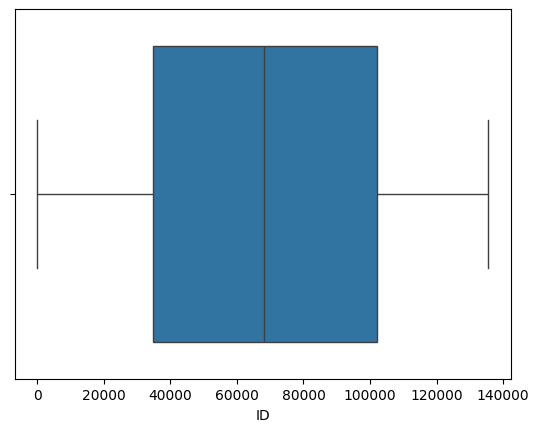

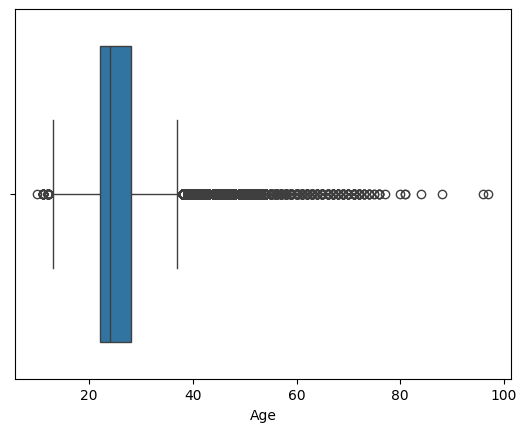

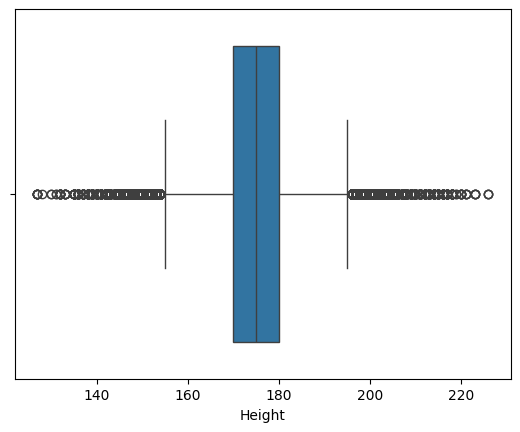

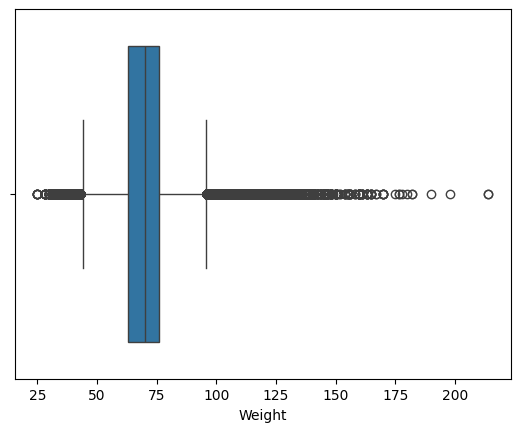

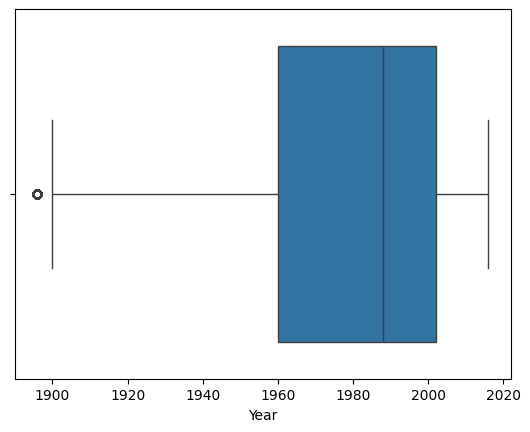

In [56]:
for i in df.select_dtypes(include="number").columns:
  sns.boxplot(data=df,x=i)
  plt.show()

In [57]:
def whisker(col):
  q1,q3=np.percentile(col,[25,75])
  iqr=q3-q1
  lower_bound=q1-(1.5*iqr)
  upper_bound=q3+(1.5*iqr)
  return lower_bound,upper_bound

In [58]:
for i in ['Age','Height','Weight','Year']:
  lower_bound,upper_bound = whisker(df[i])
  df[i] = np.where(df[i]<lower_bound,lower_bound,df[i])
  df[i] = np.where(df[i]>upper_bound,upper_bound,df[i])


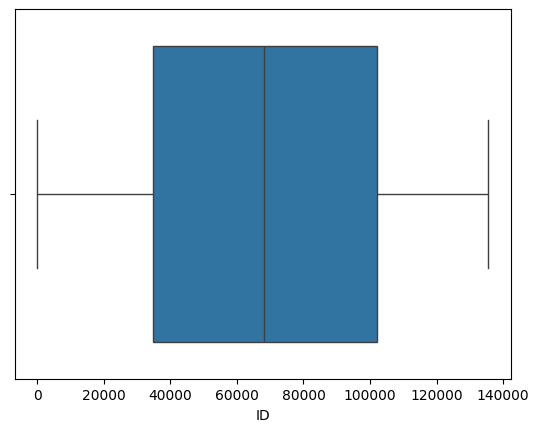

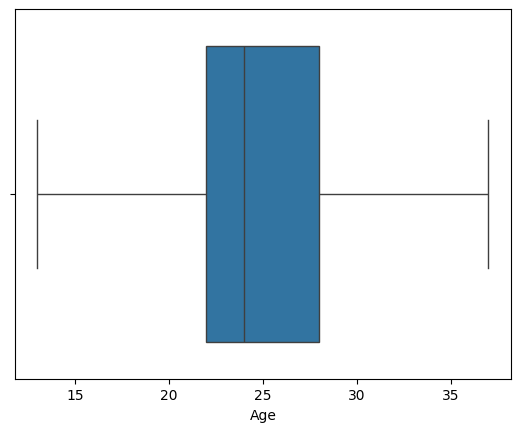

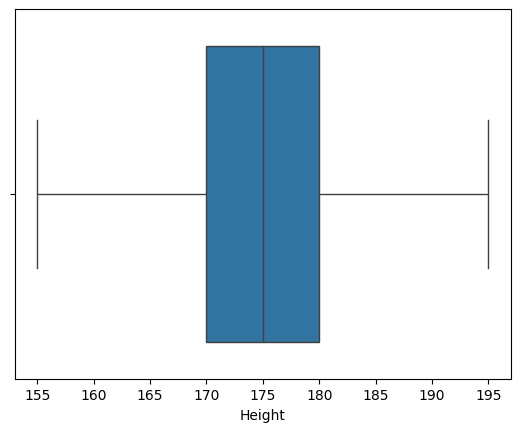

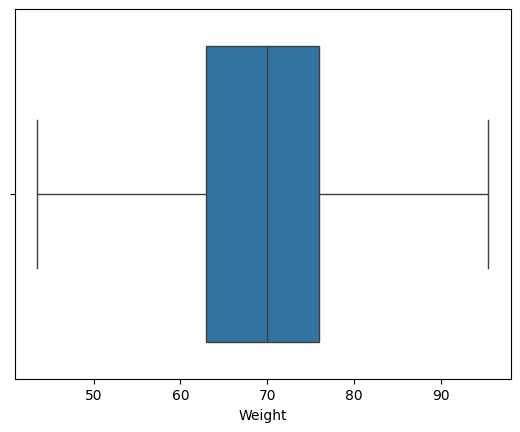

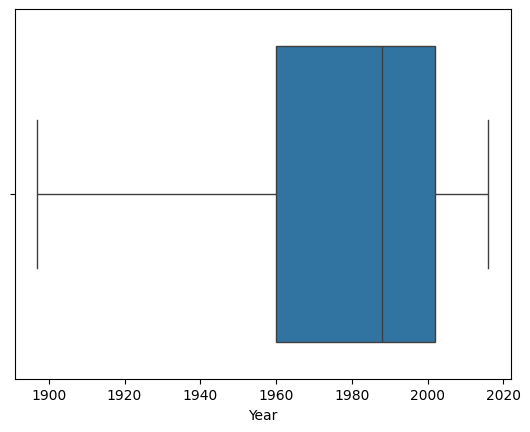

In [59]:
for i in df.select_dtypes(include = 'number').columns:
  sns.boxplot(data = df , x = i)
  plt.show()

# **Category: Country-wise Funding and Participation Strategies**

**Q1. Which cities repeatedly host Olympic Games?**

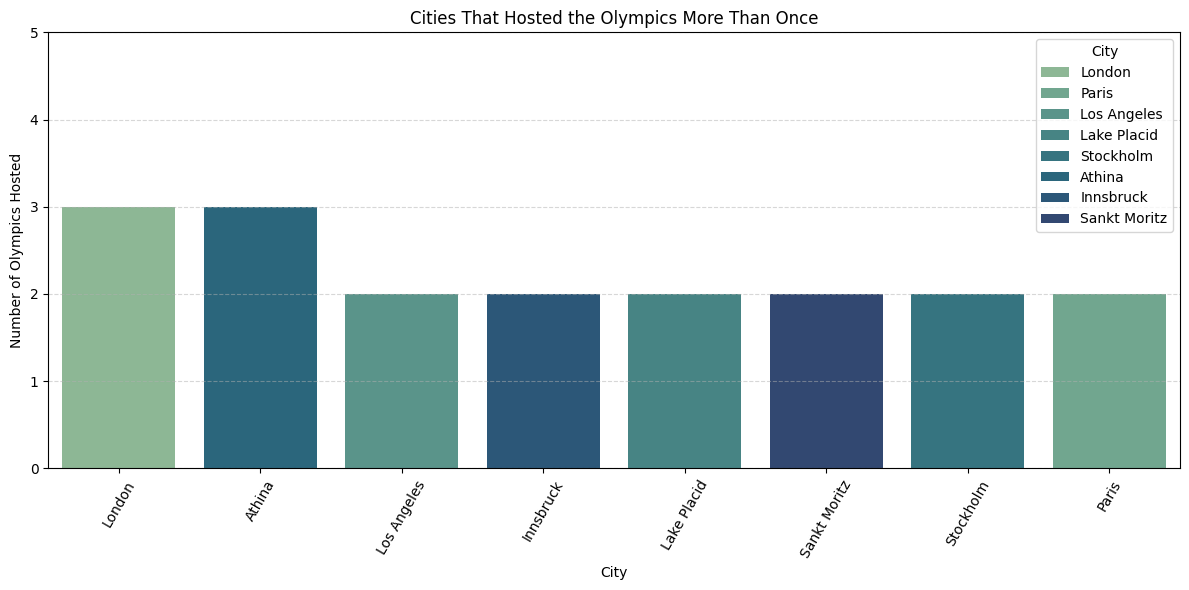

In [60]:
# Step 1: Unique City-Year pairs
unique_city_year = df[['City', 'Year']].drop_duplicates()

# Step 2: Count cities that hosted more than once
city_counts = unique_city_year['City'].value_counts()
repeated_cities = city_counts[city_counts > 1]

# Step 3: Plotting
plt.figure(figsize=(12, 6))
sns.countplot(
    data=unique_city_year[unique_city_year['City'].isin(repeated_cities.index)],
    x='City',
    hue='City',
    order=repeated_cities.index,
    palette= 'crest',
    legend=True
)

# Step 4: Plot labels and cleanup
plt.title('Cities That Hosted the Olympics More Than Once')
plt.xlabel('City')
plt.ylabel('Number of Olympics Hosted')
plt.xticks(rotation=60)
plt.yticks(np.arange(0, 6, 1)) # Y-axis in steps of 1
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Set legend to top-left corner
plt.legend(title='City', loc='upper right')

plt.tight_layout()
plt.show()


**Insight:** Cities with strong infrastructure and past success are chosen to host multiple times.

**Prescriptive Analysis:** Future host cities should invest in long-term sports facilities and learn from past host cities’ strategies.

**Q2. Is there a significant disparity between athlete participation and medal achievements among certain countries.**

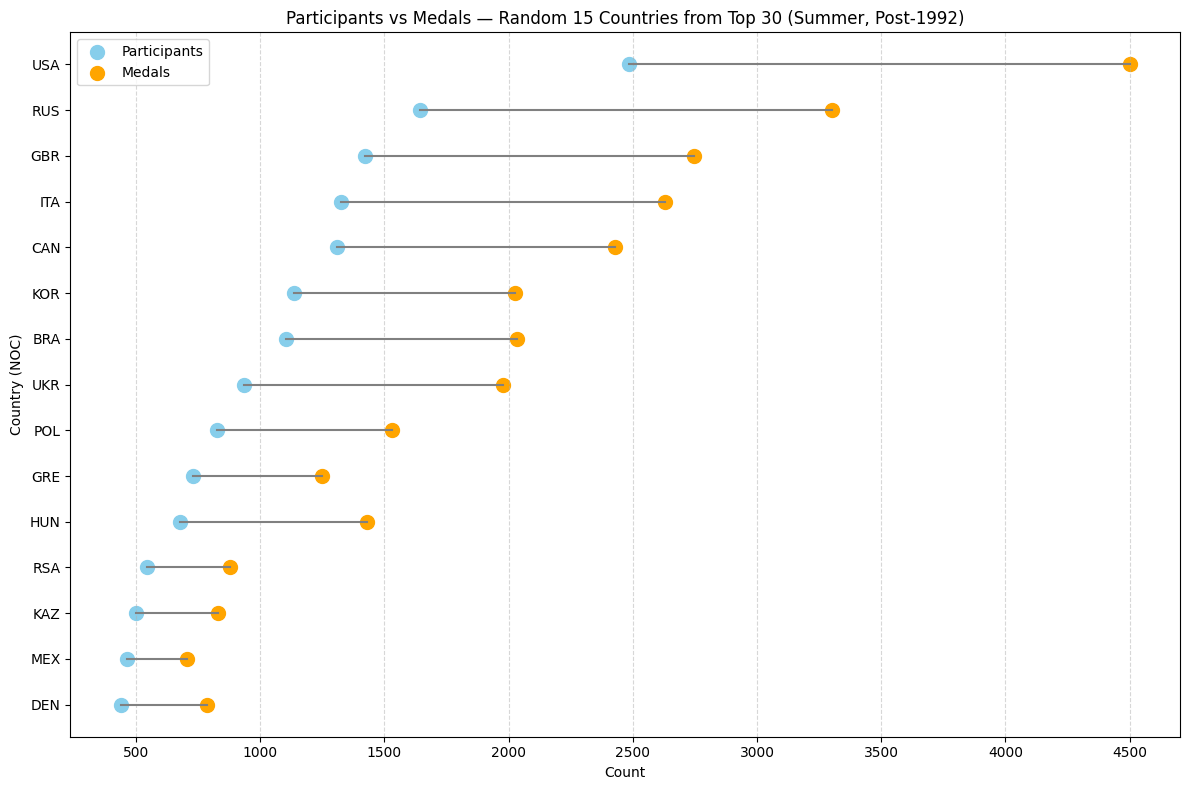

In [61]:
# Participant and medal count (Summer post-1992 only)
athletes = df[(df['Year'] > 1992) & (df['Season'] == 'Summer')]
participants = athletes.drop_duplicates(['ID', 'Year']).groupby('NOC')['ID'].nunique().reset_index(name='Total_Participants')
medal_count = athletes.dropna(subset=['Medal']).groupby('NOC')['Medal'].count().reset_index(name='Total_Medals')

# Merge & random sample
combined = participants.merge(medal_count, on='NOC', how='left').fillna(0)
random_15 = combined.nlargest(30, 'Total_Participants').sample(15, random_state=42).sort_values('Total_Participants')

# Plot
plt.figure(figsize=(12, 8))
for _, row in random_15.iterrows():
    plt.plot([row['Total_Medals'], row['Total_Participants']], [row['NOC']]*2, color='gray')
plt.scatter(random_15['Total_Participants'], random_15['NOC'], color='skyblue', label='Participants', s=100)
plt.scatter(random_15['Total_Medals'], random_15['NOC'], color='orange', label='Medals', s=100)
plt.title('Participants vs Medals — Random 15 Countries from Top 30 (Summer, Post-1992)')
plt.xlabel('Count')
plt.ylabel('Country (NOC)')
plt.legend()
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

**Insight:** Some countries send many athletes but win fewer medals, showing low medal efficiency.

**Prescriptive Analysis:** Focus on improving athlete quality and training to boost medal conversion rates.

**Q3. Are there countries that lack in Summer or in Winter Games?**

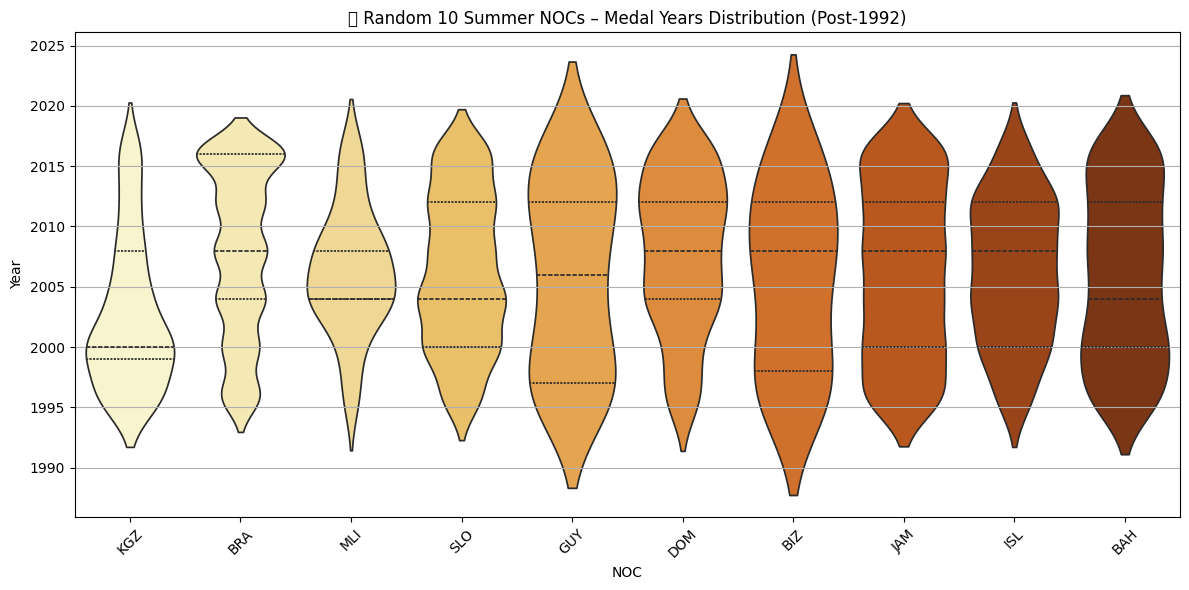

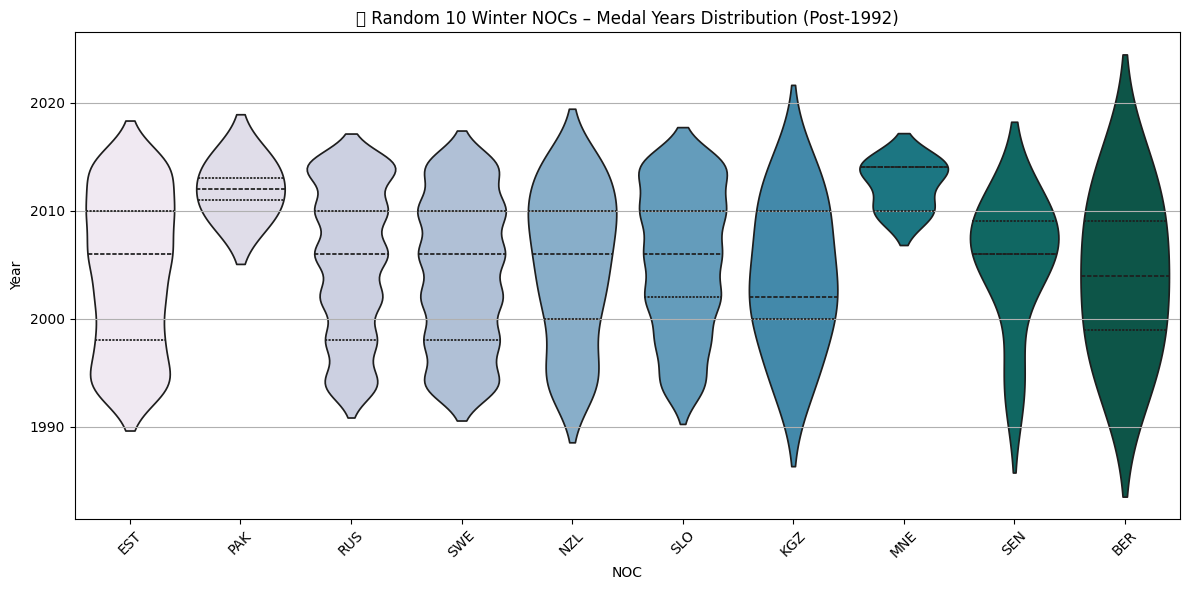

In [62]:
# Filter medal winners post-1992
medal_df = df[(df['Year'] > 1992) & df['Medal'].notna()]

# Function to get NOCs with ≥2 medal years
get_nocs = lambda season: medal_df[medal_df['Season'] == season].groupby('NOC')['Year'].nunique().loc[lambda x: x >= 2].index.tolist()

# Get 10 valid NOCs from each season
summer_nocs = random.sample(get_nocs('Summer'), 10)
winter_nocs = random.sample(get_nocs('Winter'), 10)

# Violin Plots
for season, nocs, color in [('Summer', summer_nocs, 'YlOrBr'), ('Winter', winter_nocs, 'PuBuGn')]:
    plt.figure(figsize=(12, 6))
    sns.violinplot(data=medal_df[(medal_df['Season'] == season) & medal_df['NOC'].isin(nocs)],
                   x='NOC', y='Year', palette=color, inner='quartile')
    plt.title(f"🎖 Random 10 {season} NOCs – Medal Years Distribution (Post-1992)")
    plt.xlabel("NOC")
    plt.ylabel("Year")
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

**Insight:**
This chart shows how regularly countries win medals—some win often over the years, others only in a few Olympics.

**Prescriptive Analysis:**
Countries winning in fewer years should focus on steady training and coaching to win more often in the future.


**Q4. Which country has a deteriorating medal tally?**

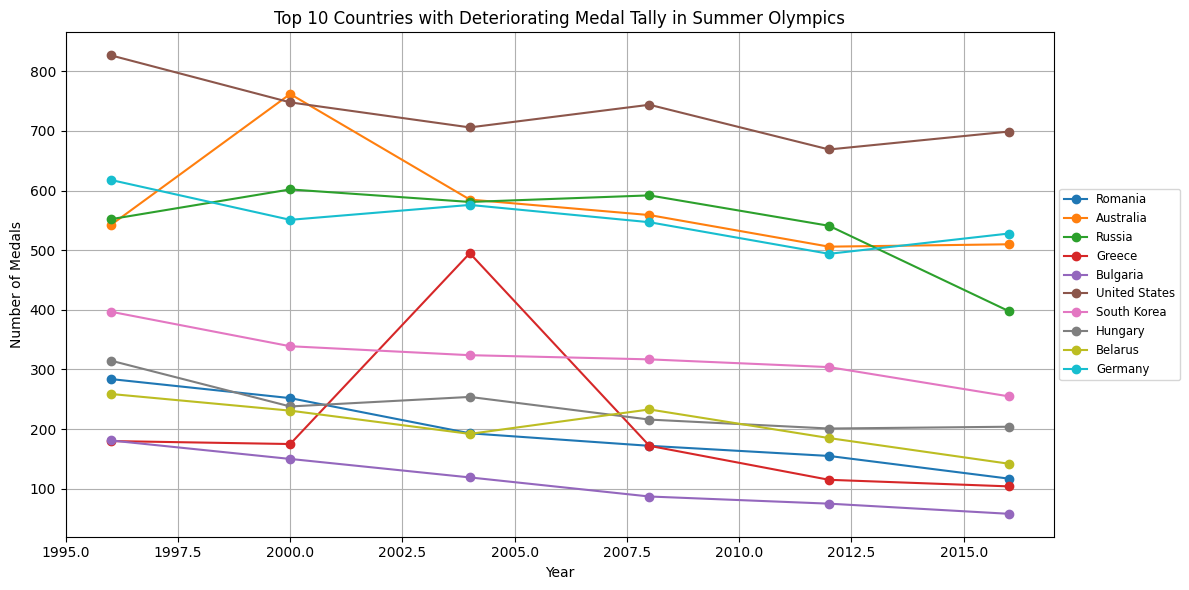

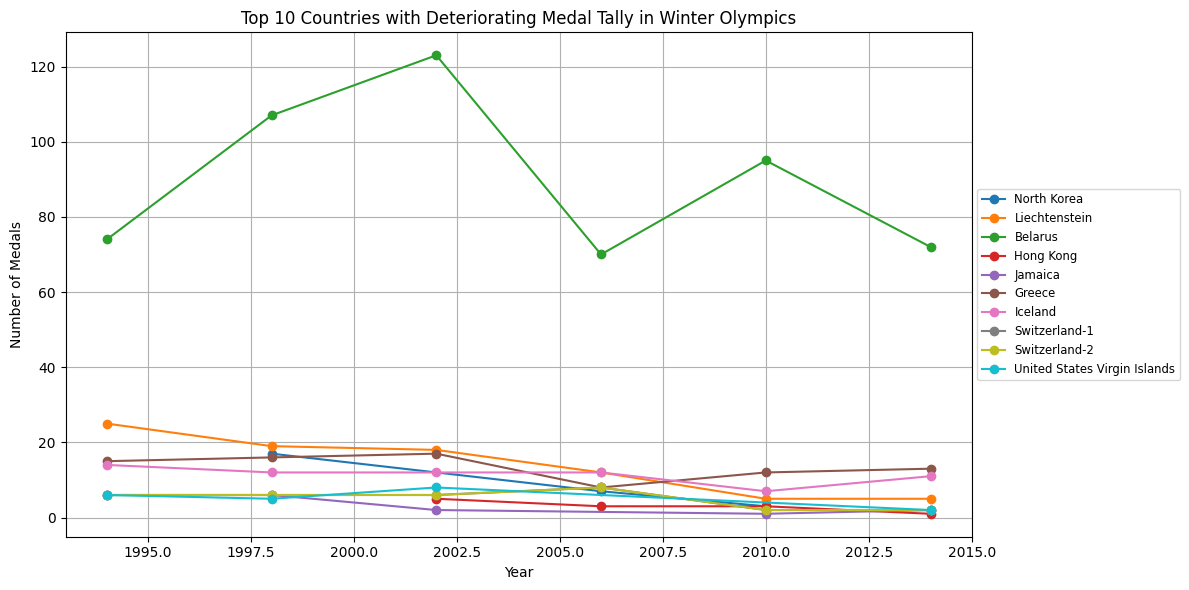

In [63]:
# Group by Team, Year, and Season
medal_tally = medal_df.groupby(['Team', 'Year', 'Season'])['Medal'].count().reset_index()

# Create a function to find deteriorating countries for a season
def get_deteriorating_countries(season):
    slope_data = []

    for team in medal_tally['Team'].unique():
        team_data = medal_tally[(medal_tally['Team'] == team) & (medal_tally['Season'] == season)]
        if len(team_data) >= 3:
          # Only consider if enough data points
            slope, _, _, p_value, _ = linregress(team_data['Year'], team_data['Medal'])
            if slope < 0:
                slope_data.append({'Team': team, 'Slope': slope, 'p_value': p_value})

    # Convert to DataFrame and pick top 10 negative slopes
    slope_df = pd.DataFrame(slope_data)
    top_10_deteriorating = slope_df.sort_values(by='Slope').head(10)
    return top_10_deteriorating

# Plot medal trends for deteriorating countries
for season in ['Summer', 'Winter']:
    top_drops = get_deteriorating_countries(season)
    plt.figure(figsize=(12, 6))
    for team in top_drops['Team']:
        team_data = medal_tally[(medal_tally['Team'] == team) & (medal_tally['Season'] == season)]
        plt.plot(team_data['Year'], team_data['Medal'], marker='o', label=team)

    plt.title(f"Top 10 Countries with Deteriorating Medal Tally in {season} Olympics")
    plt.xlabel("Year")
    plt.ylabel("Number of Medals")
    plt.grid(True)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize='small')
    plt.tight_layout()
    plt.show()

**Insight:**
Some countries used to win more medals before, but their performance has gone down over the years.

**Prescriptive Analysis:**
To bounce back, they should check what has changed in training, support young talent early, and learn from countries doing better.


# **Category: Gender Equality across events**

**Q5. What is the male vs female participation trend?**

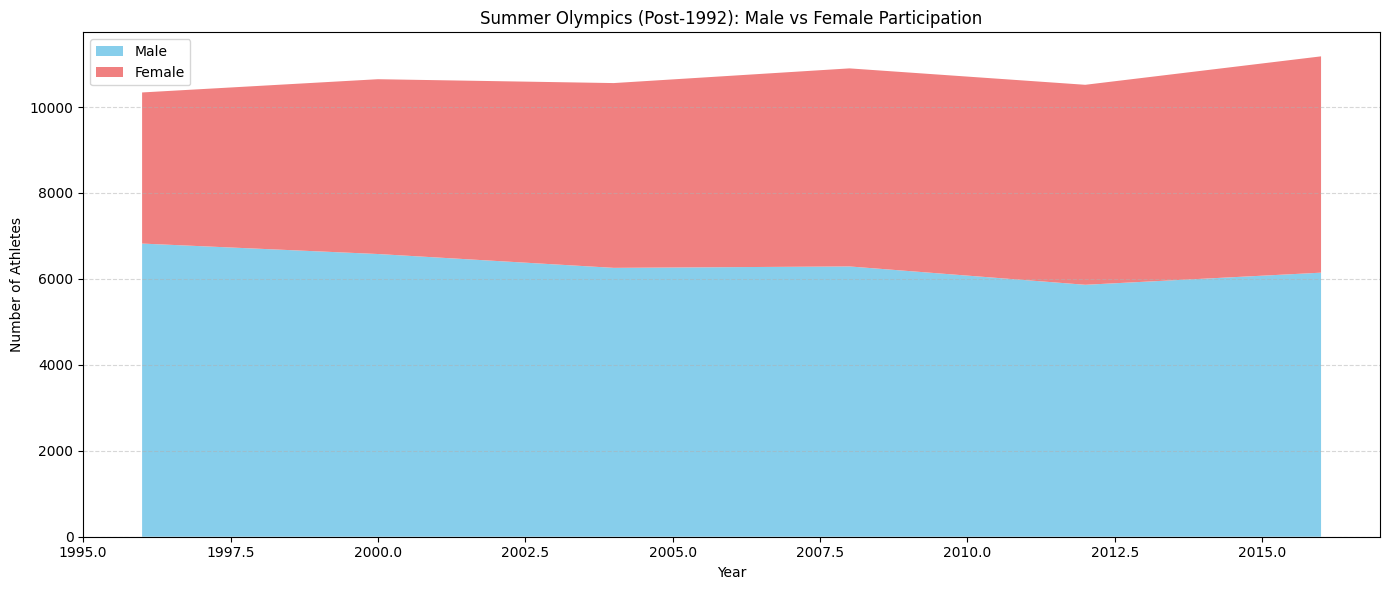

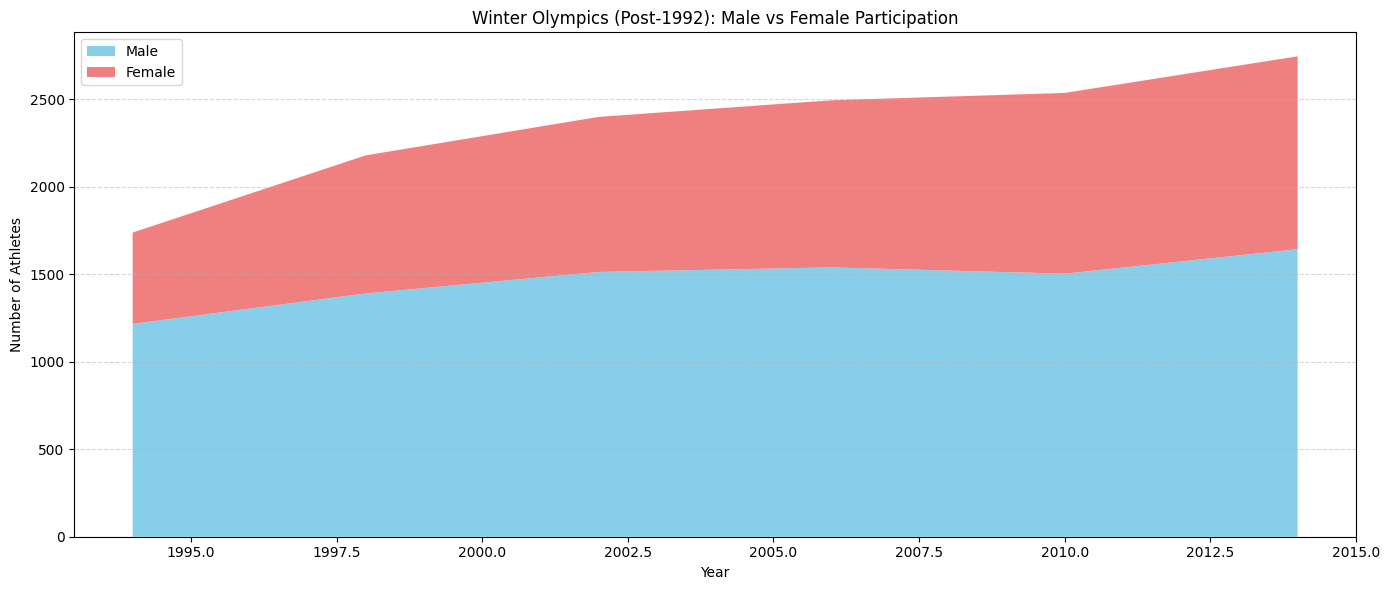

In [64]:
# Filter unique athlete entries after 1992
df_unique = df[df['Year'] > 1992][['ID', 'Year', 'Sex', 'Season']].drop_duplicates()

# Function to plot gender participation for a season
def plot_participation(season):
    data = df_unique[df_unique['Season'] == season]
    pivot = data.groupby(['Year', 'Sex'])['ID'].count().unstack().fillna(0)

    plt.figure(figsize=(14, 6))
    plt.stackplot(pivot.index, pivot['M'], pivot['F'], labels=['Male', 'Female'],
                  colors=['skyblue', 'lightcoral'])
    plt.title(f'{season} Olympics (Post-1992): Male vs Female Participation')
    plt.xlabel('Year')
    plt.ylabel('Number of Athletes')
    plt.legend(loc='upper left')
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

# Plot for Summer and Winter
plot_participation('Summer')
plot_participation('Winter')


**Insight:** Both seasons show positive trends, but women still lag behind men in some countries and sports.

**Prescriptive Analysis:** 1. Give equal entry spots to men and women.
2. Give more funds to countries with low female participation to support women’s training programs.

**Q6. Which sports are most popular among female athletes?**

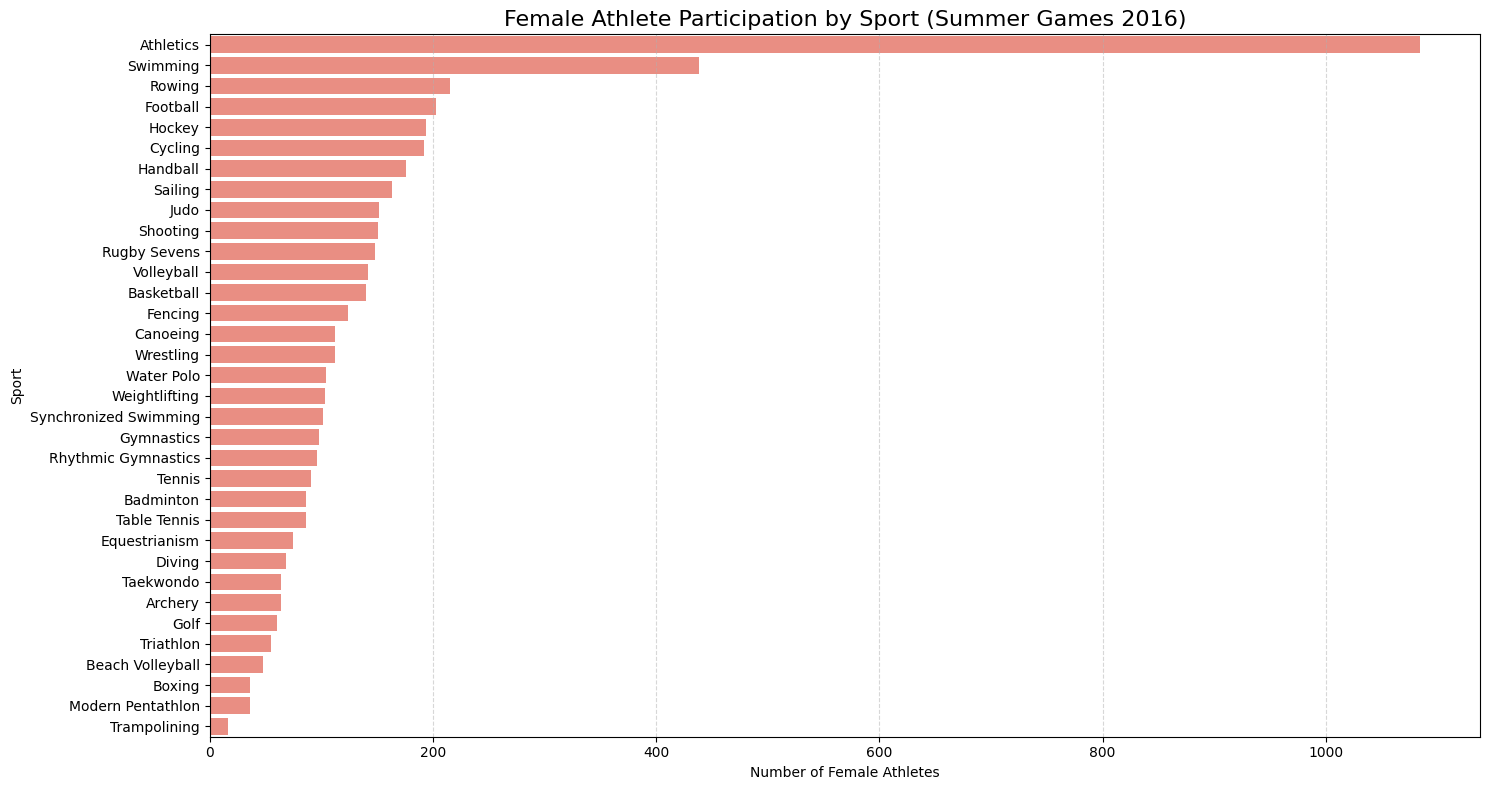

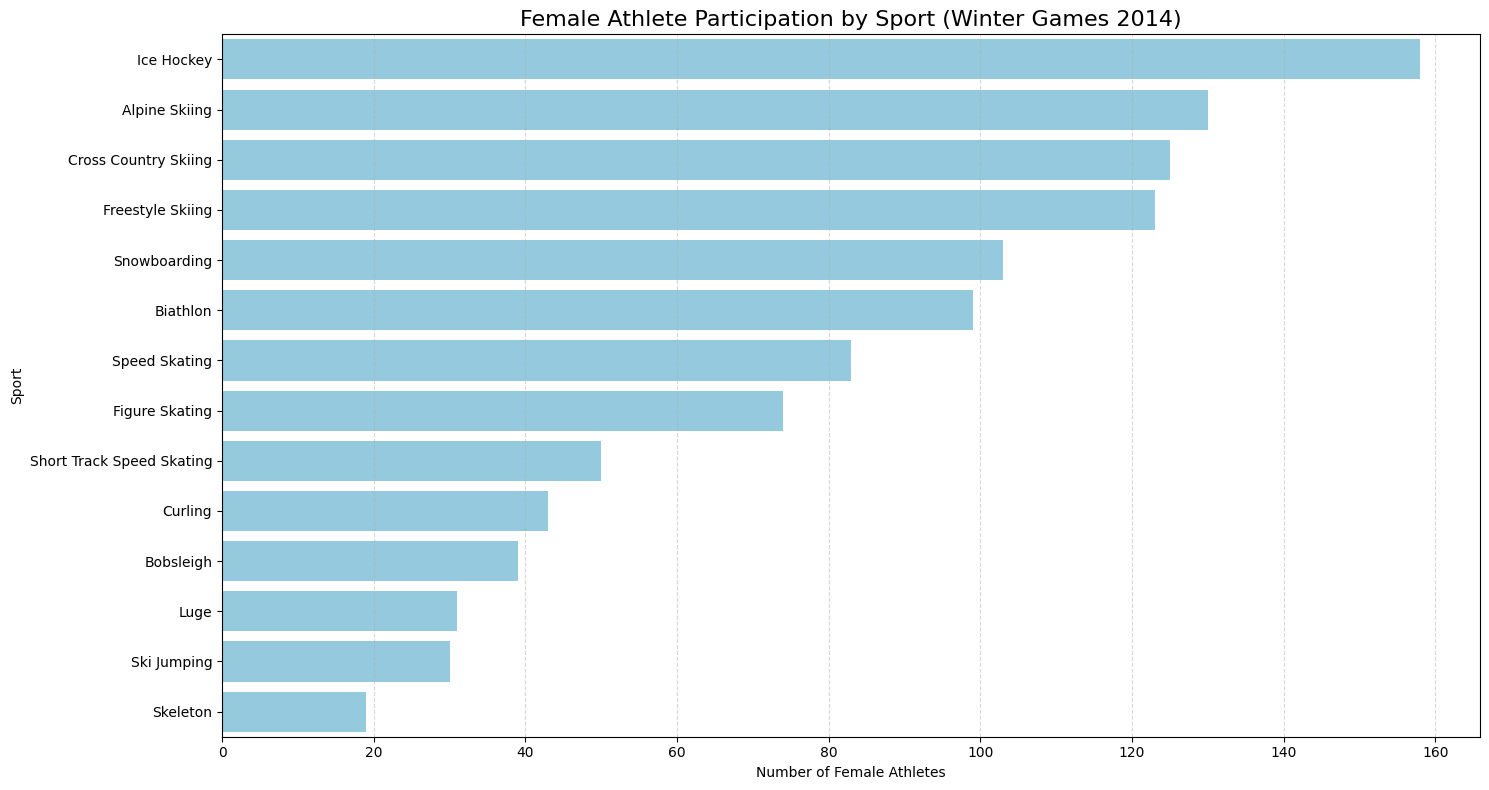

In [65]:
# Function to plot female participation by sport for a given season and year
def plot_female_sport_participation(season, year, color):
    female_df = df[(df['Sex'] == 'F') & (df['Season'] == season) & (df['Year'] == year)][['ID', 'Sport']].drop_duplicates()
    sport_counts = female_df['Sport'].value_counts().sort_values(ascending=False)

    plt.figure(figsize=(15, 8 if season == 'Summer' else 8))
    sns.barplot(x=sport_counts.values, y=sport_counts.index, color=color)
    plt.title(f'Female Athlete Participation by Sport ({season} Games {year})', fontsize=16)
    plt.xlabel('Number of Female Athletes')
    plt.ylabel('Sport')
    plt.grid(axis='x', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

# Plot for Summer and Winter
plot_female_sport_participation('Summer', 2016, 'salmon')
plot_female_sport_participation('Winter', 2014, 'skyblue')


**Insight:** Some sports have high female participation, while others still see very few women due to gender bias.

**Prescriptive Analysis:** 1. Introduce more womens events/categories in less popular sports.
2. Partner with schools to introduce lesser-known sports to girls.

# **Category: Sport Participation Trends and Underrepresentation**

**Q7. How do athletes physical traits (height/weight) relate across sports?**


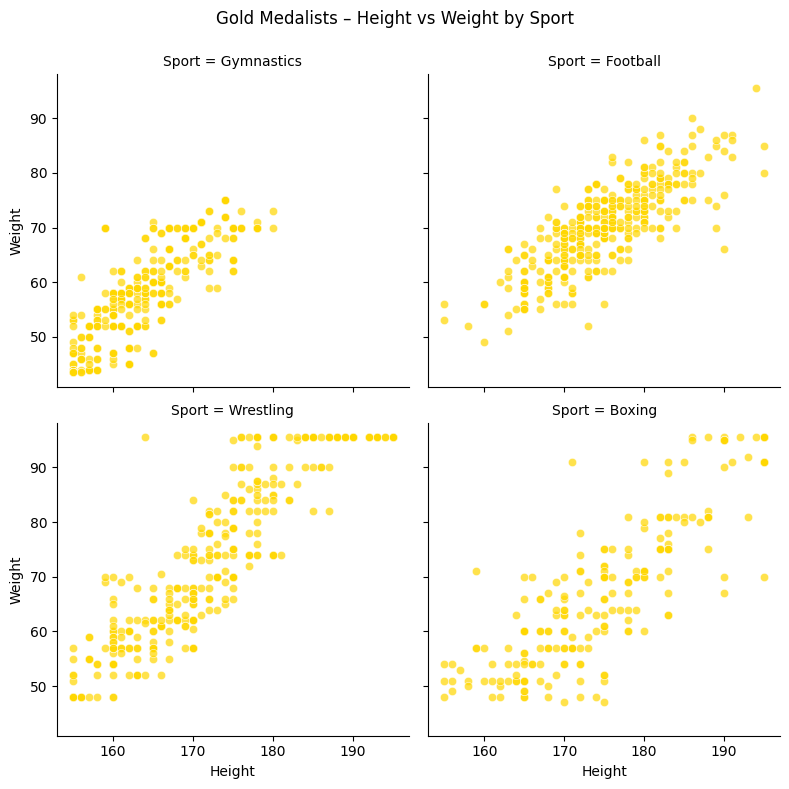

In [66]:
# Only gold medalists
df_gold = df[df['Medal'] == 'Gold']

# Select 4 specific sports
sports = ['Wrestling', 'Boxing', 'Gymnastics', 'Football']
df_sports = df_gold[df_gold['Sport'].isin(sports)].dropna(subset=['Height', 'Weight'])

# Plot: 1 chart per sport
g = sns.FacetGrid(df_sports, col="Sport", col_wrap=2, height=4)
g.map_dataframe(sns.scatterplot, x='Height', y='Weight', alpha=0.7, color='gold')
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Gold Medalists – Height vs Weight by Sport")
plt.show()


**Insight:** Different sports need different body types to succeed so this shows that each sport suits a certain kind of body.

**Prescriptive analysis:** To train top athletes, we should match typical height and weight to each sport, using this to guide fitness plans and early talent selection.




**Q8. Which sports are most age-diverse?**

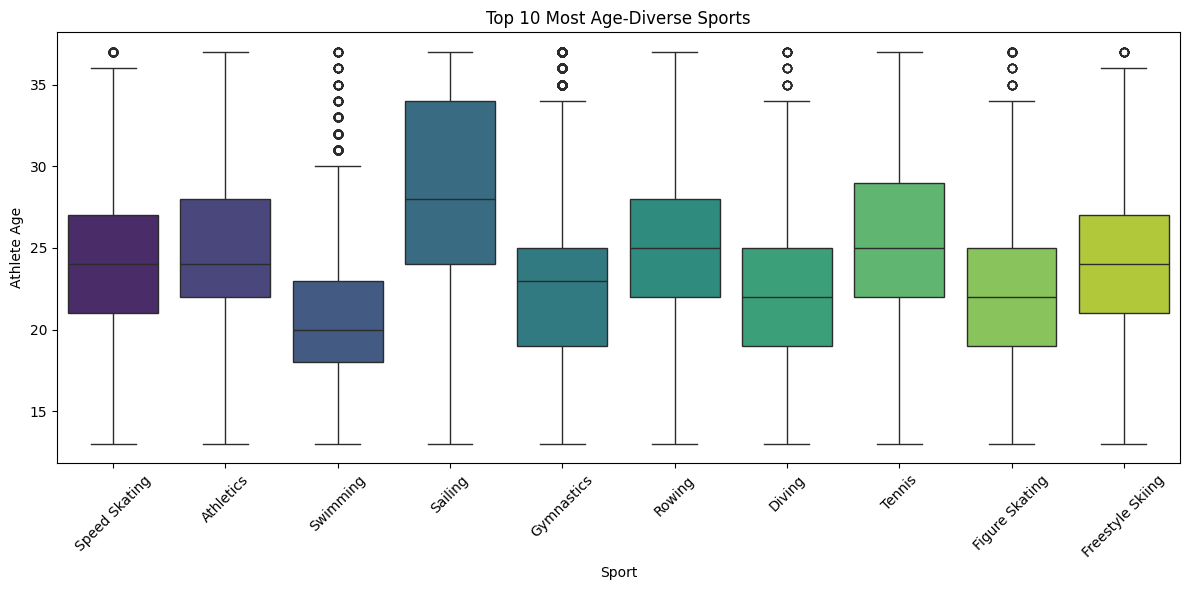

In [67]:
# Group by sport and calculate age range (max - min) and standard deviation
age_stats = df.groupby('Sport')['Age'].agg(['min', 'max', 'std'])
age_stats['range'] = age_stats['max'] - age_stats['min']

# Sort by range to get top age-diverse sports
top_age_diverse = age_stats.sort_values(by='range', ascending=False).head(10)

# Filter top 10 most age-diverse sports
top_sports = top_age_diverse.index.tolist()
df_top = df[df['Sport'].isin(top_sports)]

# Boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_top, x='Sport', y='Age', palette='viridis')
plt.title('Top 10 Most Age-Diverse Sports')
plt.xlabel('Sport')
plt.ylabel('Athlete Age')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Insight:** Sailing shows the most age diversity, while others mostly have younger athletes with a few older outliers.


**Prescriptive analysis:**
Promote age-inclusive sports with appropriate training, career research, and age-based talent planning.




**Q9. Which host cities had the highest athlete turnout?**

Text(0, 0.5, 'City')

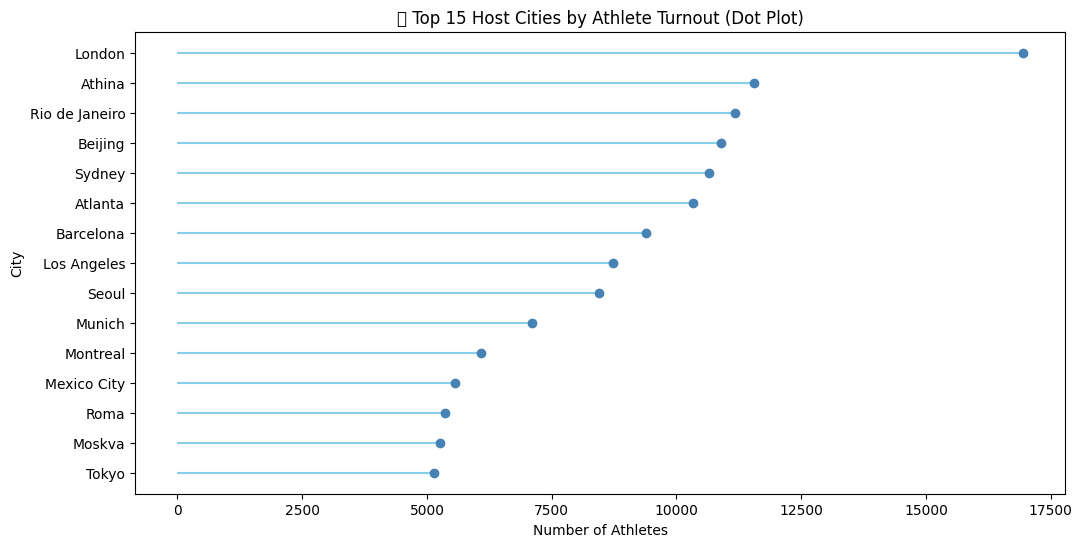

In [68]:
# Prepare data
city_df = df.groupby('City')['ID'].nunique().reset_index().sort_values(by='ID', ascending=False).head(15)

# Sort for plotting from smallest to largest
city_df = city_df.sort_values(by='ID')  # So it builds upward

# Plot
plt.figure(figsize=(12, 6))
plt.hlines(y=city_df['City'], xmin=0, xmax=city_df['ID'], color='skyblue')
plt.plot(city_df['ID'], city_df['City'], 'o', color='steelblue')

plt.title("🔵 Top 15 Host Cities by Athlete Turnout (Dot Plot)")
plt.xlabel("Number of Athletes")
plt.ylabel("City")



**Insights:** London had the highest athlete turnout among all Olympic host cities, reflecting its large-scale event capacity

**Prescriptive analysis:** Future Olympic hosts should learn from high-turnout cities like London to enhance athlete participation through better planning and infrastructure


**Q10. How does participation vary between Summer and Winter Games?**


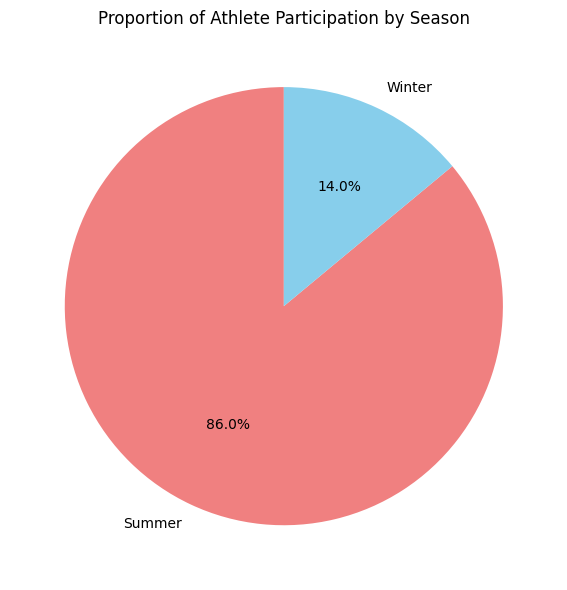

In [69]:
# Count number of unique athletes by Season
season_counts = df.groupby('Season')['ID'].nunique()

# Pie Chart
plt.figure(figsize=(6,6))
season_counts.plot(kind='pie', autopct='%1.1f%%', colors=['lightcoral', 'skyblue'], startangle=90)
plt.title('Proportion of Athlete Participation by Season')
plt.ylabel('')
plt.tight_layout()
plt.show()



**Insights:** The Summer Olympics dominate participation, accounting for 86% of all athletes compared to only 14% in the Winter Games.


**Prescriptive analysis:** To promote global inclusivity, efforts should focus on expanding winter sports access in underrepresented and tropical regions.

**Q11. Which sport has been improving and declining consistently overtime?**

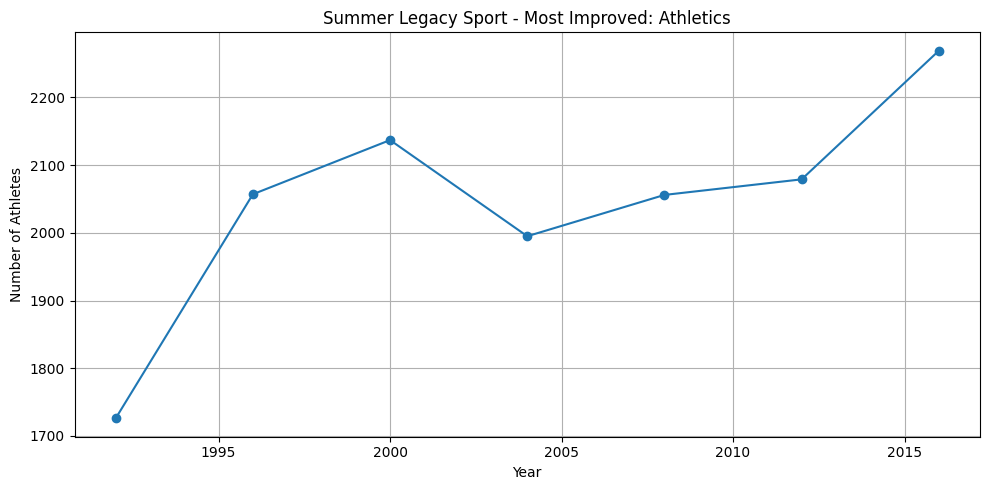

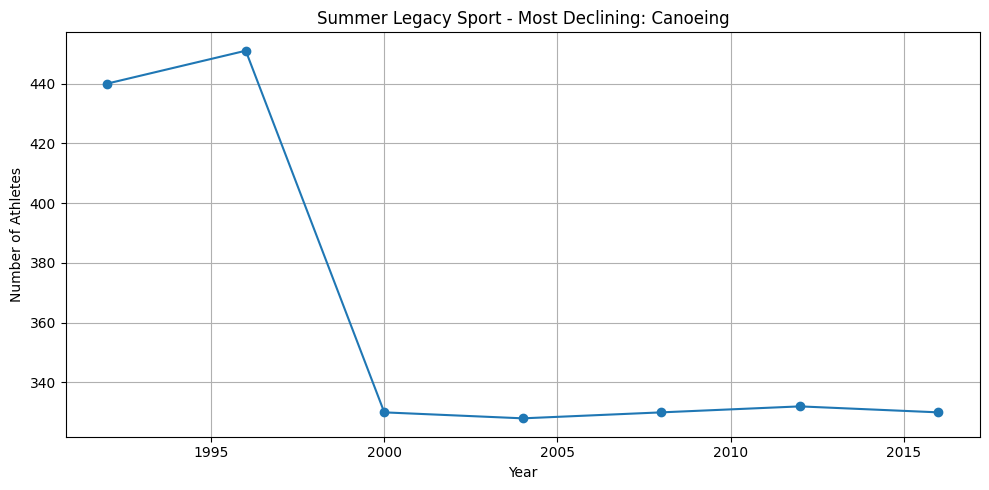

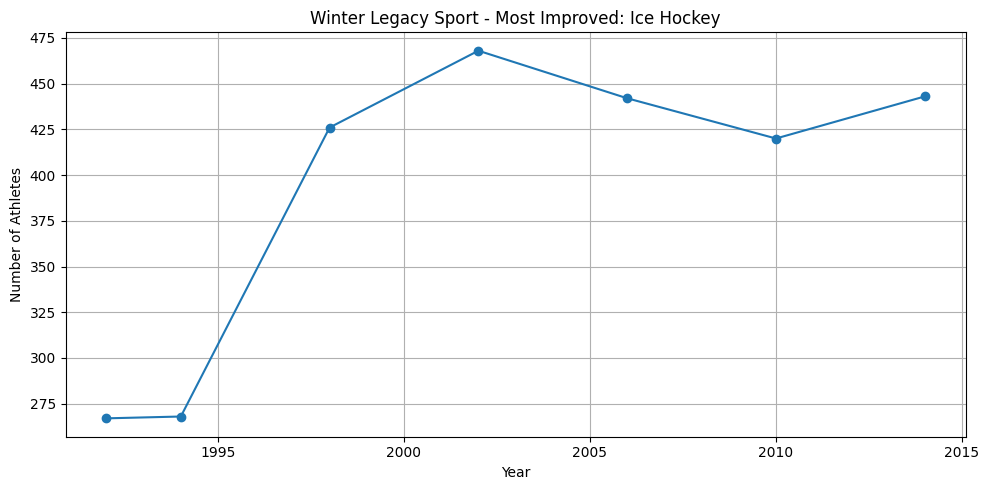

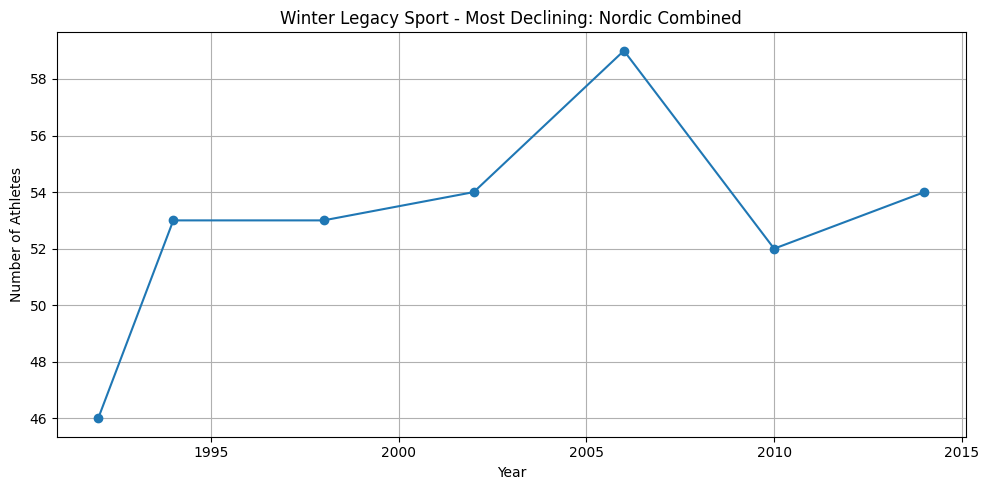

In [70]:
summer_legacy = set(df[(df['Year'] == 1992) & (df['Season'] == 'Summer')]['Sport']) & \
                set(df[(df['Year'] == 2016) & (df['Season'] == 'Summer')]['Sport'])
winter_legacy = set(df[(df['Year'] == 1992) & (df['Season'] == 'Winter')]['Sport']) & \
                set(df[(df['Year'] == 2014) & (df['Season'] == 'Winter')]['Sport'])

df = df[df['Year'] >= 1992][['Year', 'Sport', 'Season', 'ID']].drop_duplicates()

#  Trend analysis function
def trend(season, sports):
    df_season = df[(df['Season'] == season) & (df['Sport'].isin(sports))]
    pivot = df_season.groupby(['Year', 'Sport'])['ID'].count().unstack(fill_value=0)
    slopes = {sport: linregress(pivot.index, pivot[sport])[0] for sport in pivot.columns}
    return max(slopes, key=slopes.get), min(slopes, key=slopes.get), pivot

#  Plot function
def plot(pivot, sport, title):
    plt.figure(figsize=(10, 5))
    plt.plot(pivot.index, pivot[sport], marker='o')
    plt.title(title)
    plt.xlabel('Year'); plt.ylabel('Number of Athletes')
    plt.grid(True); plt.tight_layout(); plt.show()

#  Run analysis and plot
s_up, s_down, s_pivot = trend("Summer", summer_legacy)
w_up, w_down, w_pivot = trend("Winter", winter_legacy)

plot(s_pivot, s_up, f"Summer Legacy Sport - Most Improved: {s_up}")
plot(s_pivot, s_down, f"Summer Legacy Sport - Most Declining: {s_down}")

plot(w_pivot, w_up, f"Winter Legacy Sport - Most Improved: {w_up}")
plot(w_pivot, w_down, f"Winter Legacy Sport - Most Declining: {w_down}")


**Insight**: Summer - 'Athletics' is growing the most, while 'Canoeing' is declining

 Winter - 'Ice Hockey' is growing the most, while 'Nordic Combined' is declining

**Prescriptive Analysis**: For declining sports - Improve visibility through youth programs, regional training, and restructured event formats

  For growing sports - Boost funding, study success models, and scale athlete support to sustain growth



**Q12. Which sports are dominated by a few countries?**

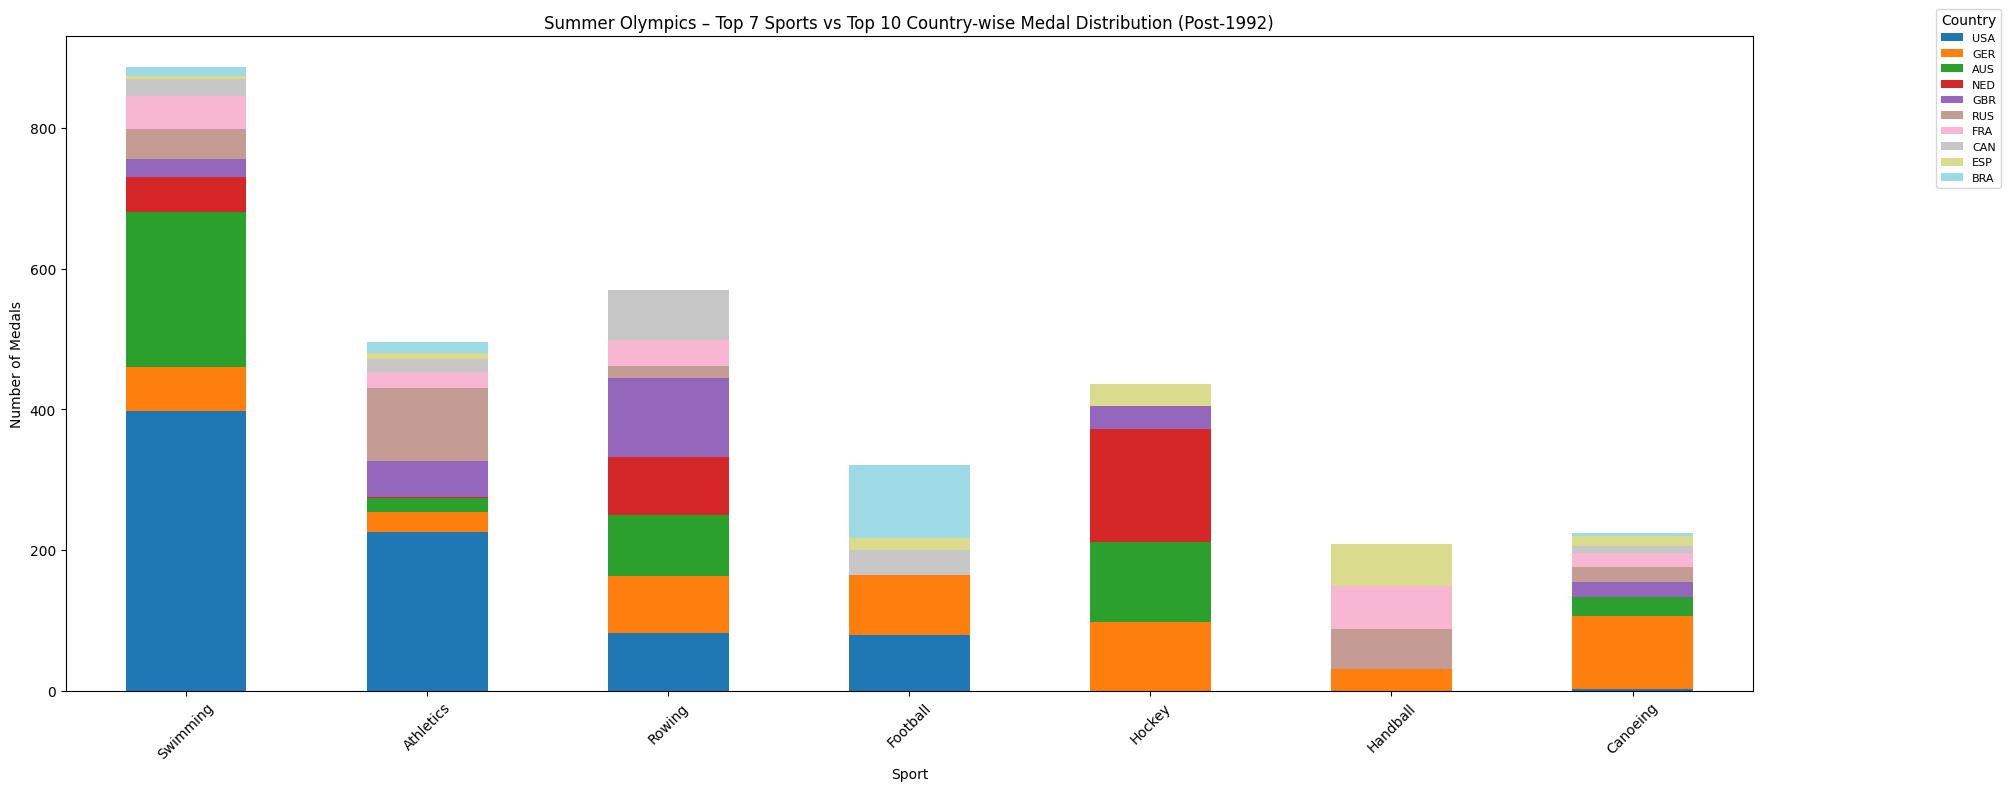

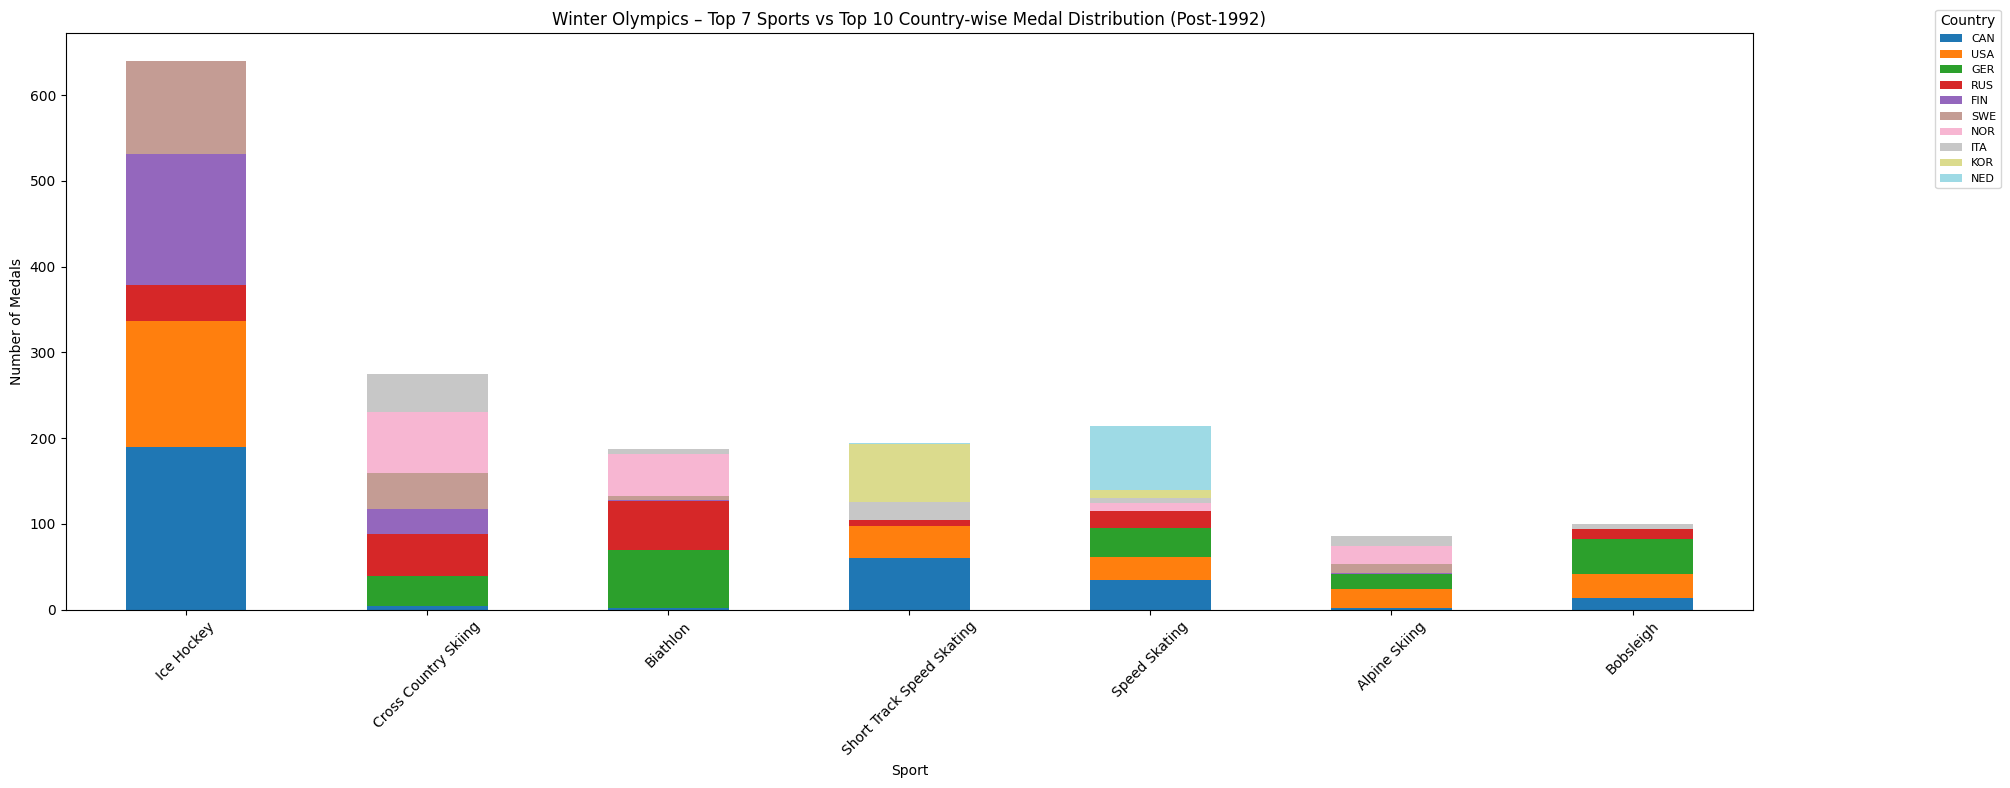

In [76]:
# Filter medal-winning entries after 1992
medals_df = df[(df['Medal'].notna()) & (df['Year'] > 1992)]

# Function to plot stacked bar chart
def plot_stacked_chart(season):
    season_df = medals_df[medals_df['Season'] == season]
    sport_country = season_df.groupby(['Sport', 'NOC']).size().unstack(fill_value=0)

    top_sports = sport_country.sum(axis=1).sort_values(ascending=False).head(7).index
    sport_country = sport_country.loc[top_sports]

    top_countries = sport_country.sum().sort_values(ascending=False).head(10).index
    sport_country = sport_country[top_countries]

    sport_country.plot(kind='bar', stacked=True, figsize=(20, 8), colormap='tab20')
    plt.title(f"{season} Olympics – Top 7 Sports vs Top 10 Country-wise Medal Distribution (Post-1992)")
    plt.xlabel('Sport')
    plt.ylabel('Number of Medals')
    plt.xticks(rotation=45)
    plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1.05), title='Country', fontsize=8)
    plt.tight_layout()
    plt.show()

# Plot for Summer
plot_stacked_chart('Summer')

# Plot for Winter
plot_stacked_chart('Winter')


**Insight:** Some sports in both Summer and Winter Olympics are dominated by a few countries like USA, Russia, Germany, and Norway.

**Prescriptive Analysis:** Improve coaching and infrastructure while launching regional-level talent hunt programs